# Определение перспективного тарифа для телеком-компании

<font size = 6>**Описание проекта**</font>

<font size = 4>Мы работаем аналитиком компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше (для компании).</font>

**Шаг 1. Открыть файл с данными и изучить общую информацию**
Путь к файлам:
/datasets/calls.csv. 
/datasets/internet.csv. 
/datasets/messages.csv. 
/datasets/tariffs.csv. 
/datasets/users.csv.

**Шаг 2. Подговить данные**
* Привести данные к нужным типам;
* Найти и исправть ошибки в данных, если они есть.
* Пояснить, какие ошибки были найдены и как оеи были исправлены. В данных есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
* Посчитать для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

**Шаг 3. Проанализировать данные**
* Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

**Шаг 4. Проверить гипотезы**
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Пороговое значение alpha задать самостоятельно.

Пояснить:
* как была сформулирована нулевая и альтернативная гипотезы;
* какой критерий использовался для проверки гипотез и почему.

**Шаг 5. Написать общий вывод**
* Оформление: Задание выполняется в Jupyter Notebook. Программный код будет заполнен в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Применить форматирование и заголовки.


**Описание данных**

Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Шаг 1. Открыть файл с данными и изучить общую информацию

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import seaborn as sns # импорт библиотеки seaborn
import matplotlib.pyplot as plt #импорт библиотеки matplotlib.pyplot
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) #Скрываем лишние предупреждения

try:
    calls = pd.read_csv('C:\Data\calls.csv', sep=",")
    internet = pd.read_csv('C:\Data\internet.csv', sep=",")
    messages = pd.read_csv('C:\Data\messages.csv', sep=",")
    tariffs = pd.read_csv('C:\\Data\\tariffs.csv', sep=",") # добавили две //, а то код выдавал ошибку
    users = pd.read_csv('C:\\Data\\users.csv', sep=",") #открываем таблицы и сохраняем под нужными названиями. # добавили две //, а то код выдавал ошибку
except:
    calls = pd.read_csv('/datasets/calls.csv', sep=",")
    internet = pd.read_csv('/datasets/internet.csv', sep=",")
    messages = pd.read_csv('/datasets/messages.csv', sep=",")
    tariffs = pd.read_csv('/datasets/tariffs.csv', sep=",") 
    users = pd.read_csv('/datasets/users.csv', sep=",") 

In [2]:
def dataset_info(data): # Для первичного ознакомления с ДатаСетом
    print(data.info())
    display(data.head())

In [3]:
for i in [users, calls, messages, internet, tariffs]:
    print('DATASET')
    print()
    dataset_info(i)
    print()

DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Вывод: Практически все данные заполнены кроме столбца `churn_date` в файле `users`. Логически можно понять, что если `churn_date` - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных), то всё логично. Также будет необходимо перевести некоторые данные в тип `Datetime` и некоторые целочисленные значения в тип `int`. Теперь перейдём к предоработке данных.**

# Шаг 2. Подговить данные

# 2.1 Таблица 'users'

In [4]:
users.info()
display(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Проверим на однотипность столбец `user_id`. Напишем функцию `id_research` чтобы проверить столбец

In [5]:
def id_research(id_column):
    print(id_column.value_counts())
    print()
    print(id_column.describe)
    print('Уникальные значения:', len(id_column.unique()))
    

In [6]:
id_research(users['user_id'])

1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64

<bound method NDFrame.describe of 0      1000
1      1001
2      1002
3      1003
4      1004
       ... 
495    1495
496    1496
497    1497
498    1498
499    1499
Name: user_id, Length: 500, dtype: int64>
Уникальные значения: 500


**Вывод: Столбец корректен. Имеются все уникальные значения от 1000 до 1499.**

**Стобец 'age'**

In [7]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

**Вывод: Столбец корректен.**

**Стобец 'churn_date'**

In [8]:
display(users['churn_date'])
#display(users.query('churn_date.isna() == False').head(10))
users['churn_date'].describe()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
495           NaN
496           NaN
497           NaN
498    2018-10-25
499           NaN
Name: churn_date, Length: 500, dtype: object

count             38
unique            33
top       2018-10-14
freq               2
Name: churn_date, dtype: object

**Данные корректны. Необходимо поменять тип на `datetime`**

In [9]:
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [10]:
display(users['churn_date'])
print(users['churn_date'].describe())

0            NaT
1            NaT
2            NaT
3            NaT
4            NaT
         ...    
495          NaT
496          NaT
497          NaT
498   2018-10-25
499          NaT
Name: churn_date, Length: 500, dtype: datetime64[ns]

count                      38
unique                     33
top       2018-10-03 00:00:00
freq                        2
first     2018-08-17 00:00:00
last      2018-12-30 00:00:00
Name: churn_date, dtype: object


**Вывод: Сменили тип данных на `datetime`**

**Столбец 'city'**

In [11]:
display(users['city'])
print(users['city'].describe())

0        Краснодар
1           Москва
2      Стерлитамак
3           Москва
4      Новокузнецк
          ...     
495        Иркутск
496        Вологда
497      Челябинск
498    Владикавказ
499          Пермь
Name: city, Length: 500, dtype: object

count        500
unique        76
top       Москва
freq          99
Name: city, dtype: object


Проверим данные на дубликаты по двум строкам - `city` и `user_id`

In [12]:
duplicates = users[users[['city', 'user_id']].duplicated(keep=False)]
display(duplicates)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


**Вывод: Дубликатов нет. Столбец корректен**

**Столбец 'first_name'**

In [13]:
display(users['first_name'])

0         Рафаил
1           Иван
2        Евгений
3          Белла
4        Татьяна
         ...    
495    Авксентий
496       Трифон
497     Каролина
498     Всеволод
499       Гектор
Name: first_name, Length: 500, dtype: object

Проверим данные на дубликаты по двум строкам - `first_name` и `user_id`

In [14]:
duplicates1 = users[users[['first_name', 'user_id']].duplicated(keep=False)]
display(duplicates1)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


**Вывод: Дубликатов нет. Столбец корректен**

**Столбец 'last_name'**

In [15]:
display(users['last_name'])


0      Верещагин
1           Ежов
2      Абрамович
3       Белякова
4       Авдеенко
         ...    
495        Фокин
496       Блохин
497       Агеева
498      Акимчин
499     Корнилов
Name: last_name, Length: 500, dtype: object

Проверим данные на дубликаты по двум строкам - `last_name` и `user_id`

In [16]:
duplicates2 = users[users[['last_name', 'user_id']].duplicated(keep=False)]
display(duplicates2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


**Вывод: Дубликатов нет. Столбец корректен**

**Столбец 'reg_date'**

In [17]:
display(users['reg_date'])

0      2018-05-25
1      2018-11-01
2      2018-06-17
3      2018-08-17
4      2018-05-14
          ...    
495    2018-08-28
496    2018-01-27
497    2018-10-09
498    2018-07-19
499    2018-09-27
Name: reg_date, Length: 500, dtype: object

Сменим тип данных на datetime

In [18]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
display(users['reg_date'])
print(users['reg_date'].describe())


0     2018-05-25
1     2018-11-01
2     2018-06-17
3     2018-08-17
4     2018-05-14
         ...    
495   2018-08-28
496   2018-01-27
497   2018-10-09
498   2018-07-19
499   2018-09-27
Name: reg_date, Length: 500, dtype: datetime64[ns]

count                     500
unique                    270
top       2018-05-28 00:00:00
freq                        8
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object


**Вывод: Сменили тип данных на datetime. Столбец корректен**

**Столбец tariff**

In [19]:
display(users['tariff'])
users['tariff'].value_counts()

0      ultra
1      smart
2      smart
3      ultra
4      ultra
       ...  
495    ultra
496    smart
497    smart
498    smart
499    smart
Name: tariff, Length: 500, dtype: object

smart    351
ultra    149
Name: tariff, dtype: int64

**Вывод: Столбец корректен**

**Проверим таблицу users**

In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Вывод: Таблица users корректна.**

# 2.2 Таблица calls

In [21]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [22]:
display(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


**Столбец 'id'**

In [23]:
display(calls['id'])
calls['id'].value_counts()

0           1000_0
1           1000_1
2           1000_2
3           1000_3
4           1000_4
            ...   
202602    1499_215
202603    1499_216
202604    1499_217
202605    1499_218
202606    1499_219
Name: id, Length: 202607, dtype: object

1217_478    1
1228_130    1
1169_66     1
1419_223    1
1139_128    1
           ..
1061_184    1
1396_699    1
1175_286    1
1134_528    1
1423_8      1
Name: id, Length: 202607, dtype: int64

**Вывод: Значения столбца `id` уникальны. Столбец корректен**

**Столбец 'call_date'**

In [24]:
display(calls['call_date'])

0         2018-07-25
1         2018-08-17
2         2018-06-11
3         2018-09-21
4         2018-12-15
             ...    
202602    2018-12-26
202603    2018-10-18
202604    2018-11-10
202605    2018-10-06
202606    2018-12-14
Name: call_date, Length: 202607, dtype: object

Сменим тип на `datetime`

In [25]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
display(calls['call_date'])

0        2018-07-25
1        2018-08-17
2        2018-06-11
3        2018-09-21
4        2018-12-15
            ...    
202602   2018-12-26
202603   2018-10-18
202604   2018-11-10
202605   2018-10-06
202606   2018-12-14
Name: call_date, Length: 202607, dtype: datetime64[ns]

In [26]:
calls['call_date'].describe()

count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

**Вывод: Сменили тип на `datetime`. Число уникальных значений - 365, совпадает с числом дней в году. Столбец корректен**

**Столбец duraton**

In [27]:
display(calls['duration'])
calls['duration'].describe()

0          0.00
1          0.00
2          2.85
3         13.80
4          5.18
          ...  
202602     0.76
202603    18.83
202604    10.81
202605     4.27
202606    19.62
Name: duration, Length: 202607, dtype: float64

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Выбросов нет. Минимум - человек не дозвонился. Максимум - 38 минут. По условию задачи, нам необходимо округлить значения в большую сторону. Сменим также тип столбца на `int`.

In [28]:
import math

In [29]:
calls['duration'] = calls['duration'].apply(math.ceil).astype(int) #встраиваем функцию round_up, а также меняем на тип int

In [30]:
display(calls['duration'])

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int64

**Вывод: Мы огруглили значения столбца в большую сторону, а также оставили только целочисленные значения после их округления. Столбец корректен.**

**Столбец user_id**

In [31]:
display(calls['user_id'])
calls['user_id'].value_counts()

0         1000
1         1000
2         1000
3         1000
4         1000
          ... 
202602    1499
202603    1499
202604    1499
202605    1499
202606    1499
Name: user_id, Length: 202607, dtype: int64

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

Проверим число уникальных значений.

In [32]:
print('Число уникальных значений:', len(calls['user_id'].unique()))

Число уникальных значений: 492


In [33]:
calls.duplicated().sum()

0

**Вывод: Столбцец корректен. Дубликатов нет**

**Проверим таблицу 'calls'**

In [34]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


**Вывод: Таблица корректна.**

# 2.3 Таблица messages

In [35]:
messages.info()
display(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


**Столбец 'id'**

In [36]:
display(messages['id'])

0           1000_0
1           1000_1
2           1000_2
3           1000_3
4           1000_4
            ...   
123031    1499_179
123032    1499_180
123033    1499_181
123034    1499_182
123035    1499_183
Name: id, Length: 123036, dtype: object

Проверим столбец на уникальность

In [37]:
messages['id'].value_counts()

1452_285     1
1211_18      1
1149_219     1
1427_46      1
1183_75      1
            ..
1221_177     1
1168_318     1
1385_1372    1
1285_509     1
1423_8       1
Name: id, Length: 123036, dtype: int64

**Вывод: Все строки уникальны. Столбец корректен**

In [38]:
display(messages['message_date'])

0         2018-06-27
1         2018-10-08
2         2018-08-04
3         2018-06-16
4         2018-12-05
             ...    
123031    2018-12-12
123032    2018-09-28
123033    2018-09-27
123034    2018-11-15
123035    2018-11-16
Name: message_date, Length: 123036, dtype: object

In [39]:
print(messages['message_date'].describe())

count         123036
unique           364
top       2018-12-31
freq             859
Name: message_date, dtype: object


Отсутствует один день из 365.

Сменим тип на `datetime`.

In [40]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [41]:
print(messages['message_date'].describe())

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object


**Вывод: Из дат отсутствует 1 января 2018 года. Скорее всего дата была исключена, так как в этот день возмождны выбросы по длительности разговора.**

In [42]:
display(messages['user_id'])
messages['user_id'].value_counts()

0         1000
1         1000
2         1000
3         1000
4         1000
          ... 
123031    1499
123032    1499
123033    1499
123034    1499
123035    1499
Name: user_id, Length: 123036, dtype: int64

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1111       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

In [43]:
print('Число уникальных значений:', len(messages['user_id'].unique()))

Число уникальных значений: 426


In [44]:
messages.duplicated().sum()

0

In [45]:
messages['user_id'].describe()

count    123036.000000
mean       1256.989410
std         143.523967
min        1000.000000
25%        1134.000000
50%        1271.000000
75%        1381.000000
max        1499.000000
Name: user_id, dtype: float64

**Вывод: Распределение вполне нормальное, однако имеются такие выбросы как пересылка 1000 сообщений . Скорее всего, это юр. лица, которые делают рассылку. Также заметны абоненты, которые практически не отправляют SMS. Скорее всего, они больше предпочитают Интернет.**

**Проверим таблицу 'messages'**

In [46]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


**Вывод: Таблица корректна.**

# 2.4 Таблица Internet

In [47]:
internet.info()
display(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


В таблице присутствует 5 столбцов вместо 4 заявленных. Удалим столбец `"Unnamed: 0"`, посокльку он повторяет индексы.

In [48]:
internet.drop('Unnamed: 0', axis=1, inplace=True)

In [49]:
display(internet)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object)

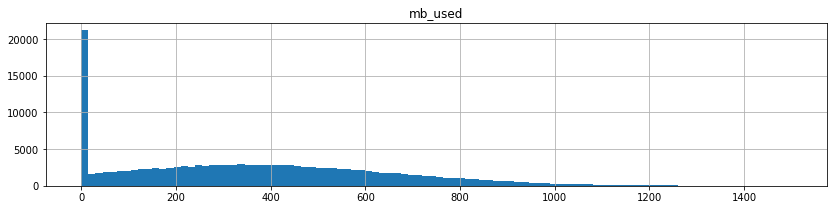

In [50]:
internet.hist('mb_used', bins=100, figsize=(14,3), range=(0, 1500))

In [51]:
internet['mb_used'].value_counts()

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
182.69        1
726.03        1
315.12        1
898.99        1
677.66        1
Name: mb_used, Length: 70003, dtype: int64

**Вывод: Мы удалили ненужный столбец `Unnamed: 0`.**

In [52]:
#internet['month'] = pd.DatetimeIndex(internet['session_date']).month
#abonents_internet = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
#abonents_internet.columns = ['user_id', 'month', 'mb']


#display(internet)

In [53]:
#internet['month'] = pd.DatetimeIndex(internet['session_date']).month
#internet.groupby('month')['id'].count().reset_index()

In [54]:
#internet['month'].groupby('id').count().reset_index()
display(internet)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [55]:
display(internet)
internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


**Вывод: Теперь столбцы корректны.**

**Столбец 'id'**

In [56]:
display(internet['id'])
internet['id'].value_counts()

0           1000_0
1           1000_1
2           1000_2
3           1000_3
4           1000_4
            ...   
149391    1499_152
149392    1499_153
149393    1499_154
149394    1499_155
149395    1499_156
Name: id, Length: 149396, dtype: object

1439_306    1
1240_507    1
1233_321    1
1026_74     1
1420_184    1
           ..
1272_180    1
1395_648    1
1262_566    1
1284_284    1
1246_175    1
Name: id, Length: 149396, dtype: int64

**Вывод: Все значения уникальны. Столбец корректен.**

**Столбец 'mb_used'**

In [57]:
display(internet['mb_used'])
internet['mb_used'].describe()

0          112.95
1         1052.81
2         1197.26
3          550.27
4          302.56
           ...   
149391     318.90
149392     490.13
149393       0.00
149394    1246.32
149395     544.37
Name: mb_used, Length: 149396, dtype: float64

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

**Вывод: Выбросы отсутствуют. Значения правдободобны от 0 до 1725 МБ. 0 МБ - отсутствия соединения с Интернетом в течение месяца. Скорее всего, либо были проблемы с Интернетом у абонента, либо он им вообще не пользовался. Столбец корректен.**

**Столбец 'session_date'**

In [58]:
display(internet['session_date'])
internet['session_date'].describe()

0         2018-11-25
1         2018-09-07
2         2018-06-25
3         2018-08-22
4         2018-09-24
             ...    
149391    2018-10-03
149392    2018-12-14
149393    2018-10-27
149394    2018-11-26
149395    2018-10-26
Name: session_date, Length: 149396, dtype: object

count         149396
unique           365
top       2018-12-31
freq            1057
Name: session_date, dtype: object

**Вывод: Столбец кооректен.**

**Столбец 'user_id'**

In [59]:
display(internet['user_id'])
internet['user_id'].value_counts()

0         1000
1         1000
2         1000
3         1000
4         1000
          ... 
149391    1499
149392    1499
149393    1499
149394    1499
149395    1499
Name: user_id, Length: 149396, dtype: int64

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

In [60]:
internet.duplicated().sum()

0

In [61]:
print('Число уникальных значений:', len(internet['user_id'].unique()))

Число уникальных значений: 497


**Вывод: Столбец кооректен.**

**Проверим таблицу Internet**

In [62]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


**Вывод: Таблица корректна.**

# 2.5 Таблица tariffs

In [63]:
tariffs.info()
display(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Вывод: Таблица корректна.**

# 2.6 Предоработка с датой 01.01.2018 в таблице 'messages' столбца 'message_date'

Проверим, сколько было абонентов на 01.01.2018.

In [64]:
users[users['reg_date']=='2018-01-01']

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
193,1193,55,NaT,Тамбов,Арсен,Безруков,2018-01-01,smart
453,1453,50,NaT,Москва,Кузьма,Акуленко,2018-01-01,ultra


Проверим, сколько было сделано звонков на 01.01.2018

In [65]:
calls[calls['call_date']=='2018-01-01']

,id,call_date,duration,user_id
76907,1193_169,2018-01-01,14,1193
180968,1453_160,2018-01-01,0,1453
181106,1453_298,2018-01-01,16,1453
181239,1453_431,2018-01-01,20,1453
181903,1453_1095,2018-01-01,6,1453


Проверим, сколько интернет-сессий было на 01.01.2018

In [66]:
internet[internet['session_date']=='2018-01-01']

,id,mb_used,session_date,user_id
57584,1193_123,0.00,2018-01-01,1193
135081,1453_302,794.96,2018-01-01,1453
135277,1453_498,209.31,2018-01-01,1453


**Вывод: Исходя из вышеприведённых таблиц, можно сказать, что сообщений 01.01.2018 года никто не высылал, поскольку число пользователей (2), число звонков (6) и число Интернет-пользователей (3) было мало.**

# 2.7 Выводы по предоработке

**В целом, столбец корректен. Были проверены даты на корректность. Даты были переведены в тип `datetime` где было необходимо, дубликаты отсутствовали. Таблицы корректны.**

# Расчёт показателей

**Согласно Шагу 2, выполним следующие задачи. Рассичтаем:**
* количество сделанных звонков и израсходованных минут разговора по месяцам (столбцы calls и minutes);
* количество отправленных сообщений по месяцам (столбец messages);
* объем израсходованного интернет-трафика по месяцам (столбец mb);
* помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану) (столбец income).

Поместим вышеперечисленные данные в столбец abonents. Перед этим ставим в таблицы `calls`, `messages` и `internet` столбец `month`, чтобы сгруппировать данные. Потом создадим 3 таблицы `abonents_calls`, `abonents_messages` и `abonents_internet`.

# 2.8 Таблицы calls, messages и internet

In [67]:
display(internet['mb_used'])

0          112.95
1         1052.81
2         1197.26
3          550.27
4          302.56
           ...   
149391     318.90
149392     490.13
149393       0.00
149394    1246.32
149395     544.37
Name: mb_used, Length: 149396, dtype: float64

In [68]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month #вставляем столбец month для группировки данных
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.groupby('month')['user_id'].count().reset_index()

,month,user_id
0,1,1117
1,2,2641
2,3,4885
3,4,6511
4,5,9408
5,6,11057
6,7,13548
7,8,16092
8,9,17512
9,10,20009


In [69]:
internet = internet.pivot_table(index=['user_id', 'month'],  values='mb_used', aggfunc='sum').reset_index()
internet.columns = ['user_id', 'month', 'mb_sum_internet']
internet.head()


,user_id,month,mb_sum_internet
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [70]:
internet['gb_sum_internet'] = np.ceil(internet['mb_sum_internet'] / 1024).astype(int) # мы переводим мегабайты в гигабайты, а также встраиваем функцию np.ceil и меняем на тип int

In [71]:
display(calls.head(), messages.head(), internet.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,user_id,month,mb_sum_internet,gb_sum_internet
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15


Теперь создадим три таблицы `abonents_calls`, `abonents_messages` и `abonents_internet`, которые будут сгруппированы по `user_id` и `month`, где будут вычеслены результаты трёх пунктов исследования.

In [72]:
abonent = pd.DataFrame()



abonents_calls = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()
abonents_calls.columns = ['user_id', 'month', 'calls', 'minutes']

abonents_messages = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
abonents_messages.columns = ['user_id', 'month', 'messages']


abonents_internet = internet.groupby(['user_id', 'month'])['gb_sum_internet'].sum().reset_index()
abonents_internet.columns = ['user_id', 'month', 'gb']

display(abonents_calls.head(10))
display(abonents_messages.head(10))
display(abonents_internet.head(10))

,user_id,month,calls,minutes
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


,user_id,month,gb
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
5,1000,10,15
6,1000,11,15
7,1000,12,10
8,1001,11,18
9,1001,12,14


# 2.9 Таблица abonents

Создадим из трёх таблиц `abonents_calls`, `abonents_messages` и `abonents_internet` одну единую таблицу `abonents`.

In [73]:
all_abonents = users.loc[:,['user_id', 'city', 'tariff']]

abonents = pd.merge(abonents_calls, abonents_messages, how='outer', on=['user_id', 'month']) 
abonents = pd.merge(abonents, abonents_internet, how='outer', on=['user_id', 'month']) 
abonents = pd.merge(abonents, all_abonents, how='outer', on=['user_id'])
display(abonents)

,user_id,month,calls,minutes,messages,gb,city,tariff
0,1000,5.0,22.0,159.0,22.0,3.0,Краснодар,ultra
1,1000,6.0,43.0,172.0,60.0,23.0,Краснодар,ultra
2,1000,7.0,47.0,340.0,75.0,14.0,Краснодар,ultra
3,1000,8.0,52.0,408.0,81.0,14.0,Краснодар,ultra
4,1000,9.0,58.0,466.0,57.0,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,21.0,20.0,Санкт-Петербург,smart
3212,1489,11.0,NaN,NaN,20.0,18.0,Санкт-Петербург,smart
3213,1489,12.0,NaN,NaN,35.0,17.0,Санкт-Петербург,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,Волжский,ultra


Проверим число абонентов. Их долджно быть 500.

In [74]:
print(len(abonents['user_id'].unique()))

500


Чтобы посчитать выручку income, необходимо избавиться от нулей.

In [75]:
abonents.isna().sum()

user_id       0
month         2
calls        42
minutes      42
messages    499
gb           13
city          0
tariff        0
dtype: int64

In [76]:
abonents.loc[:, ['calls', 'minutes', 'messages', 'gb']] = abonents.loc[:, ['calls', 'minutes', 'messages', 'gb']].fillna(0)

In [77]:
display(abonents)

,user_id,month,calls,minutes,messages,gb,city,tariff
0,1000,5.0,22.0,159.0,22.0,3.0,Краснодар,ultra
1,1000,6.0,43.0,172.0,60.0,23.0,Краснодар,ultra
2,1000,7.0,47.0,340.0,75.0,14.0,Краснодар,ultra
3,1000,8.0,52.0,408.0,81.0,14.0,Краснодар,ultra
4,1000,9.0,58.0,466.0,57.0,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.0,21.0,20.0,Санкт-Петербург,smart
3212,1489,11.0,0.0,0.0,20.0,18.0,Санкт-Петербург,smart
3213,1489,12.0,0.0,0.0,35.0,17.0,Санкт-Петербург,smart
3214,1128,NaN,0.0,0.0,0.0,0.0,Волжский,ultra


In [78]:
abonents.isna().sum()

user_id     0
month       2
calls       0
minutes     0
messages    0
gb          0
city        0
tariff      0
dtype: int64

In [79]:
abonents.loc[:, 'month'] = abonents.loc[:, 'month'].fillna(0)
abonents.isna().sum()

user_id     0
month       0
calls       0
minutes     0
messages    0
gb          0
city        0
tariff      0
dtype: int64

In [80]:
#abonents['mb'] = abonents['mb'].astype(int)
#abonents.rename(columns={'mb': 'gb'}, inplace=True)
display(abonents)
abonents.drop([3214, 3215], axis=0, inplace=True)

,user_id,month,calls,minutes,messages,gb,city,tariff
0,1000,5.0,22.0,159.0,22.0,3.0,Краснодар,ultra
1,1000,6.0,43.0,172.0,60.0,23.0,Краснодар,ultra
2,1000,7.0,47.0,340.0,75.0,14.0,Краснодар,ultra
3,1000,8.0,52.0,408.0,81.0,14.0,Краснодар,ultra
4,1000,9.0,58.0,466.0,57.0,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.0,21.0,20.0,Санкт-Петербург,smart
3212,1489,11.0,0.0,0.0,20.0,18.0,Санкт-Петербург,smart
3213,1489,12.0,0.0,0.0,35.0,17.0,Санкт-Петербург,smart
3214,1128,0.0,0.0,0.0,0.0,0.0,Волжский,ultra


# 2.10 Столбец 'income'

Создадим столбец `income` в таблице `abonents`. Напишем цикл, который принимает строку и возвращает значение выручки. (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану)

In [81]:
def income_month(i):
    
    if i['tariff'] == 'smart':
        
        income_calls = (i['minutes'] - tariffs.loc[0, 'minutes_included']) * tariffs.loc[0, 'rub_per_minute']
        if income_calls < 0:
            income_calls = 0
        
        income_messages = (i['messages'] - tariffs.loc[0, 'messages_included']) * tariffs.loc[0, 'rub_per_message']
        if income_messages < 0:
            income_messages = 0
        
        
        income_mb = np.ceil((i['gb'] - tariffs.loc[0, 'mb_per_month_included'])/1024) * tariffs.loc[0, 'rub_per_gb']
        if income_mb < 0:
            income_mb = 0
        
        income = income_calls + income_messages + income_mb + tariffs.loc[0, 'rub_monthly_fee']
   
    elif i['tariff'] == 'ultra':
        
        income_calls = (i['minutes'] - tariffs.loc[1, 'minutes_included']) * tariffs.loc[1, 'rub_per_minute']
        if income_calls < 0:
            income_calls = 0
        
        income_messages = (i['messages'] - tariffs.loc[1, 'messages_included']) * tariffs.loc[1, 'rub_per_message']
        if income_messages < 0:
            income_messages = 0
        
        income_mb = np.ceil((i['gb'] - tariffs.loc[1, 'mb_per_month_included'])/1024) * tariffs.loc[1, 'rub_per_gb']
        if income_mb < 0:
            income_mb = 0
        
        income = income_calls + income_messages + income_mb + tariffs.loc[1, 'rub_monthly_fee']
        
    else:
        print('Неизвестный тариф')
       
       
        
    return income

abonents['income'] = abonents.apply(income_month, axis=1)
abonents['income'] = abonents['income'].astype(int)

# Выводы по расчётам показателей: 

**Мы создали таблицу `abonents`, в которых провели группировку по абоненту за каждый месяц пользования, заполнили пропуски, а также вычислили 4 столбца: `minutes` использованные минуты за месяц, `messages` - высланные СМС за месяц, `mb` потреченные мегабайт за месяц и `income` - выручка за месяц.**

# Шаг 3. Анализ данных

**Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.**

In [82]:
display(abonents)

,user_id,month,calls,minutes,messages,gb,city,tariff,income
0,1000,5.0,22.0,159.0,22.0,3.0,Краснодар,ultra,1950
1,1000,6.0,43.0,172.0,60.0,23.0,Краснодар,ultra,1950
2,1000,7.0,47.0,340.0,75.0,14.0,Краснодар,ultra,1950
3,1000,8.0,52.0,408.0,81.0,14.0,Краснодар,ultra,1950
4,1000,9.0,58.0,466.0,57.0,15.0,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,11.0,Санкт-Петербург,smart,550
3210,1489,9.0,0.0,0.0,32.0,17.0,Санкт-Петербург,smart,550
3211,1489,10.0,0.0,0.0,21.0,20.0,Санкт-Петербург,smart,550
3212,1489,11.0,0.0,0.0,20.0,18.0,Санкт-Петербург,smart,550


In [83]:
abonents['gb'].value_counts()

17.0    223
16.0    214
19.0    199
18.0    181
14.0    179
15.0    179
20.0    176
21.0    158
22.0    155
12.0    147
13.0    140
11.0    112
23.0    105
9.0      97
25.0     85
10.0     81
24.0     71
8.0      61
27.0     58
28.0     55
7.0      52
26.0     48
5.0      45
3.0      43
6.0      42
29.0     37
4.0      34
1.0      26
2.0      24
32.0     24
30.0     22
31.0     19
33.0     18
34.0     14
0.0      13
35.0     13
37.0     11
38.0     10
36.0      9
42.0      9
39.0      9
43.0      6
40.0      4
41.0      2
45.0      1
44.0      1
49.0      1
48.0      1
Name: gb, dtype: int64

**Рассчитаем показатели по всем месяцам по обоим тарифам.**

In [84]:
all_clients_month = abonents.groupby(['tariff', 'month'])['minutes', 'messages', 'gb', 'income'].sum().reset_index()
display(all_clients_month)

,tariff,month,minutes,messages,gb,income
0,smart,1.0,6931.0,620.0,297.0,18925
1,smart,2.0,17324.0,1397.0,687.0,34801
2,smart,3.0,30034.0,2453.0,1173.0,51476
3,smart,4.0,41119.0,3443.0,1526.0,71866
4,smart,5.0,54618.0,4762.0,2243.0,91449
5,smart,6.0,64885.0,5478.0,2616.0,107459
6,smart,7.0,82079.0,6784.0,3191.0,134814
7,smart,8.0,99045.0,7905.0,3933.0,162340
8,smart,9.0,111439.0,8746.0,4262.0,180986
9,smart,10.0,125284.0,9927.0,4963.0,206067


Разобъём на две таблицы для удобства.

In [85]:
smart_all_clients_month = all_clients_month.query(' tariff=="smart" ')
ultra_all_clients_month = all_clients_month.query(' tariff=="ultra" ').reset_index(drop=True)

In [86]:
display(smart_all_clients_month)

,tariff,month,minutes,messages,gb,income
0,smart,1.0,6931.0,620.0,297.0,18925
1,smart,2.0,17324.0,1397.0,687.0,34801
2,smart,3.0,30034.0,2453.0,1173.0,51476
3,smart,4.0,41119.0,3443.0,1526.0,71866
4,smart,5.0,54618.0,4762.0,2243.0,91449
5,smart,6.0,64885.0,5478.0,2616.0,107459
6,smart,7.0,82079.0,6784.0,3191.0,134814
7,smart,8.0,99045.0,7905.0,3933.0,162340
8,smart,9.0,111439.0,8746.0,4262.0,180986
9,smart,10.0,125284.0,9927.0,4963.0,206067


In [87]:
display(ultra_all_clients_month)

,tariff,month,minutes,messages,gb,income
0,ultra,1.0,3853.0,304.0,119.0,17550
1,ultra,2.0,7131.0,527.0,288.0,46800
2,ultra,3.0,18117.0,1195.0,653.0,72150
3,ultra,4.0,25191.0,1736.0,933.0,107250
4,ultra,5.0,34192.0,2536.0,1298.0,130650
5,ultra,6.0,40295.0,3505.0,1591.0,163800
6,ultra,7.0,49667.0,4536.0,1866.0,177450
7,ultra,8.0,54653.0,5183.0,2097.0,208650
8,ultra,9.0,62036.0,6013.0,2213.0,224250
9,ultra,10.0,68644.0,7187.0,2468.0,239850


Построим графики (столбчатые диаграммы) распределения по тарифам и месяцам.

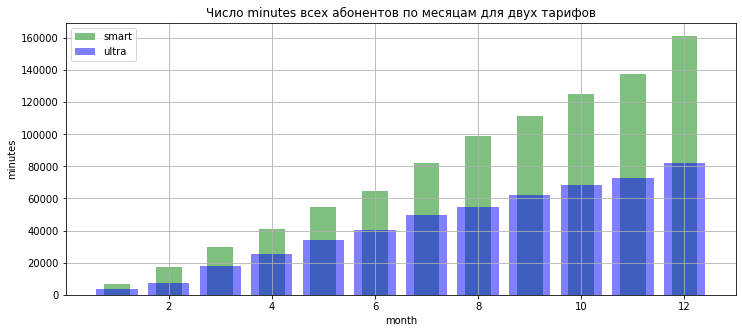

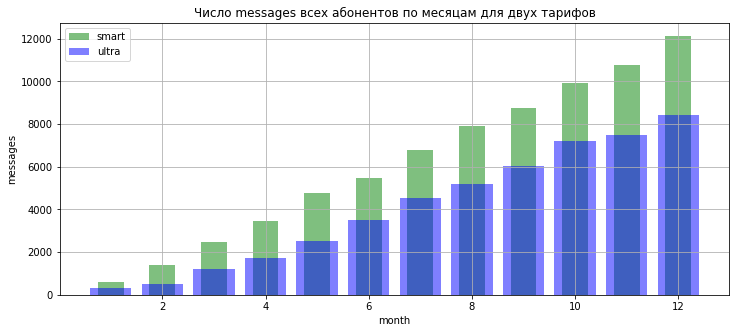

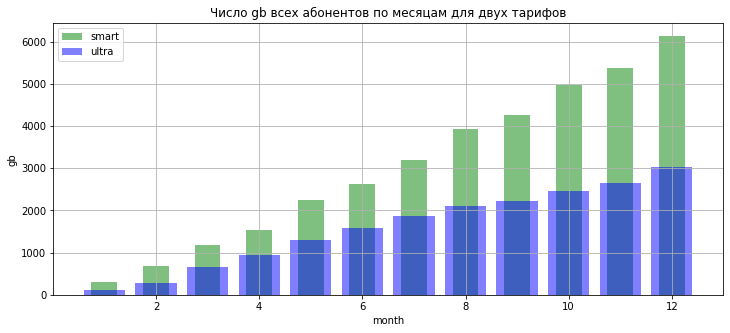

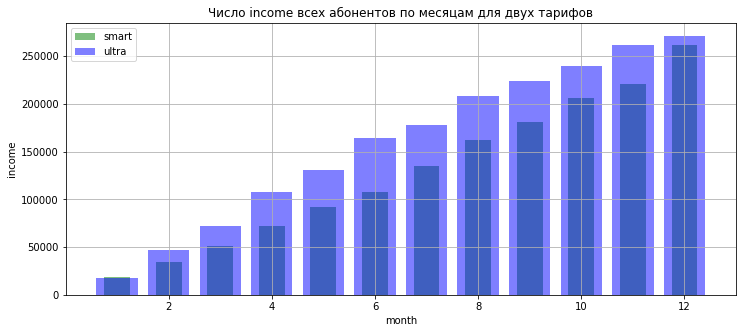

In [88]:
for parameters in ['minutes', 'messages', 'gb','income']:
    plt.figure(figsize=(12, 5))
    plt.bar(smart_all_clients_month['month'], smart_all_clients_month[parameters], label='smart', color='g', alpha=0.5, width=0.5)
    plt.bar(ultra_all_clients_month['month'], ultra_all_clients_month[parameters], label='ultra', color='b', alpha=0.5)

    plt.xlabel('month')
    plt.ylabel(parameters)
    plt.grid()
    plt.title(f'Число {parameters} всех абонентов по месяцам для двух тарифов')
    plt.legend()
    plt.show();

Посмотрим, сколько абонентов по каждому тарифу.

In [89]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

**Вывод: Из вышеприведённых графиков видно, что число расходов минут, СМС и мегабайт Интернета больше в тарифе smart. Если говорить о выручке, то тариф smart в мае месяца начинает обгонять тариф ultra. Тем не менее, можно сказать, что на всех графиках число абонентов растёт с каждым месяцем в обоих тарифах. Для наглядности построим графики со средними и медианными значениями.**

In [90]:
abonents[['minutes', 'messages', 'gb','income']].describe()

,minutes,messages,gb,income
count,3214.000000,3214.000000,3214.000000,3214.000000
mean,451.244866,38.281269,17.299004,1077.691661
std,241.909978,36.148326,7.400584,619.356225
min,0.000000,0.000000,0.000000,550.000000
25%,282.000000,9.000000,13.000000,550.000000
50%,443.000000,30.000000,17.000000,688.000000
75%,589.000000,57.000000,21.000000,1950.000000
max,1673.000000,224.000000,49.000000,3397.000000


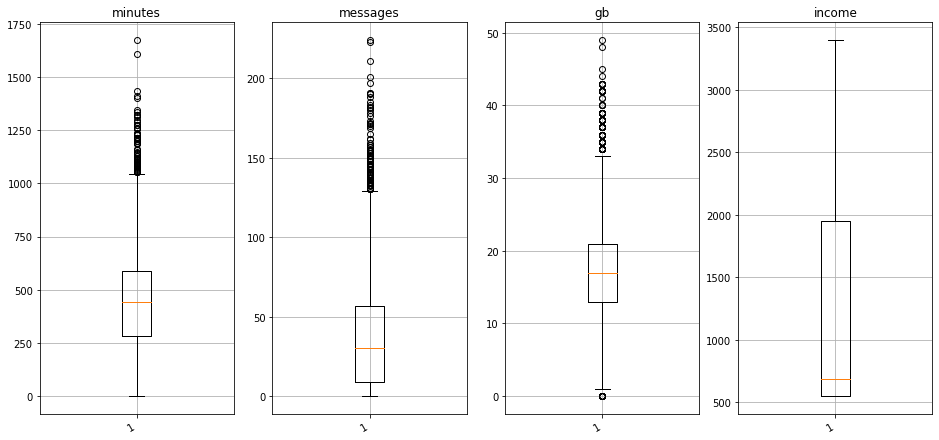

In [91]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16, 8))
p = {ax1:'minutes', ax2:'messages', ax3:'gb', ax4:'income'}
for ax in [ax1, ax2, ax3, ax4]:
    ax.boxplot(abonents[p[ax]])
    ax.grid()
    ax.set_title(p[ax])

fig.autofmt_xdate()

На графиках мы не наблюдаем больших выбросов. Однако для точности будем использовать медианные значения.

Создадим общую таблицу по всем тарифам `tariff_common`.

In [92]:
tariff_common = abonents.groupby(['tariff', 'month'])['minutes', 'messages', 'gb','income'].mean().reset_index()
display(tariff_common)

,tariff,month,minutes,messages,gb,income
0,smart,1.0,203.852941,18.235294,8.735294,556.617647
1,smart,2.0,298.689655,24.086207,11.844828,600.017241
2,smart,3.0,390.051948,31.857143,15.233766,668.519481
3,smart,4.0,367.133929,30.741071,13.625000,641.660714
4,smart,5.0,387.361702,33.773050,15.907801,648.574468
5,smart,6.0,395.640244,33.402439,15.951220,655.237805
6,smart,7.0,408.353234,33.751244,15.875622,670.716418
7,smart,8.0,421.468085,33.638298,16.736170,690.808511
8,smart,9.0,428.611538,33.638462,16.392308,696.100000
9,smart,10.0,426.136054,33.765306,16.880952,700.908163


Разделим тарифы на две части - `smart` и `ultra`.

In [93]:
smart = tariff_common.query(' tariff=="smart" ')
ultra = tariff_common[tariff_common['tariff']=='ultra'].reset_index(drop=True)

In [94]:
display(smart)

,tariff,month,minutes,messages,gb,income
0,smart,1.0,203.852941,18.235294,8.735294,556.617647
1,smart,2.0,298.689655,24.086207,11.844828,600.017241
2,smart,3.0,390.051948,31.857143,15.233766,668.519481
3,smart,4.0,367.133929,30.741071,13.625000,641.660714
4,smart,5.0,387.361702,33.773050,15.907801,648.574468
5,smart,6.0,395.640244,33.402439,15.951220,655.237805
6,smart,7.0,408.353234,33.751244,15.875622,670.716418
7,smart,8.0,421.468085,33.638298,16.736170,690.808511
8,smart,9.0,428.611538,33.638462,16.392308,696.100000
9,smart,10.0,426.136054,33.765306,16.880952,700.908163


In [95]:
display(ultra)

,tariff,month,minutes,messages,gb,income
0,ultra,1.0,428.111111,33.777778,13.222222,1950.0
1,ultra,2.0,297.125000,21.958333,12.000000,1950.0
2,ultra,3.0,489.648649,32.297297,17.648649,1950.0
3,ultra,4.0,458.018182,31.563636,16.963636,1950.0
4,ultra,5.0,510.328358,37.850746,19.373134,1950.0
5,ultra,6.0,479.702381,41.726190,18.940476,1950.0
6,ultra,7.0,545.791209,49.846154,20.505495,1950.0
7,ultra,8.0,510.775701,48.439252,19.598131,1950.0
8,ultra,9.0,539.443478,52.286957,19.243478,1950.0
9,ultra,10.0,558.081301,58.430894,20.065041,1950.0


In [96]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Построим графики по усреднённым расходам для двух тарифов по месяцам для одного абонента.

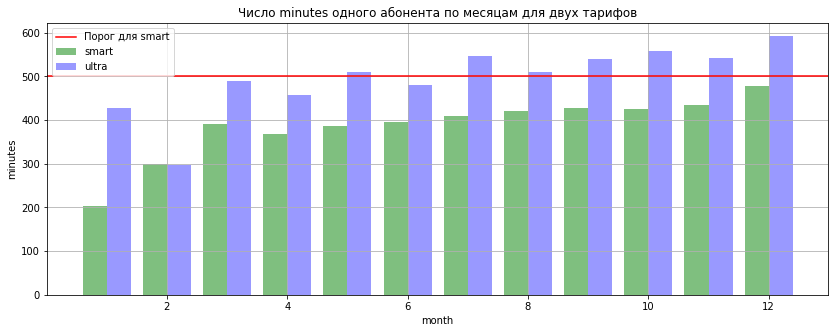

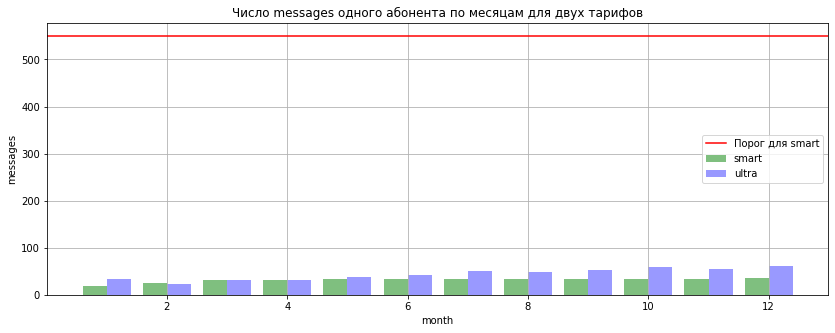

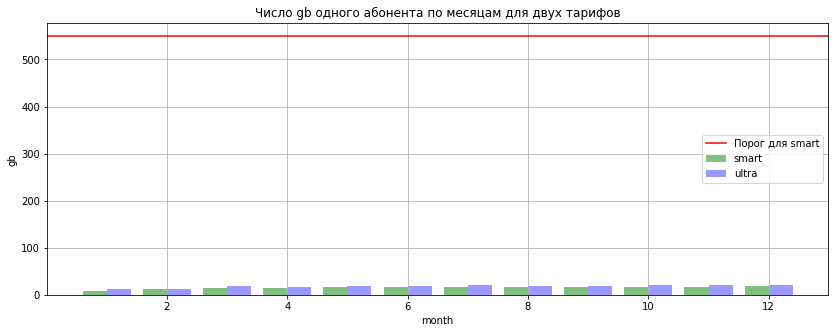

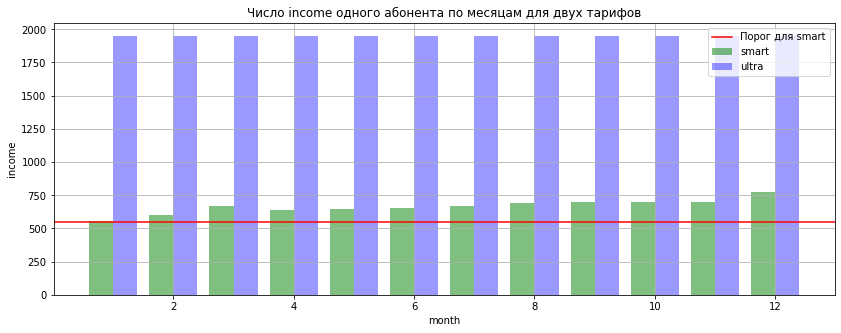

In [97]:
for param in ['minutes', 'messages', 'gb','income']:
    w = 0.4
    plt.figure(figsize=(14, 5))
    plt.bar(smart['month']-w/2, smart[param], label='smart', color='g', alpha=0.5, width=w)
    plt.bar(ultra['month']+w/2, ultra[param], label='ultra', color='b', alpha=0.4, width=w)
    
    if param == 'minutes':
        threshold=500 # threshold - пороговое значение, после которого оплата идёт сверх абонентской
    elif threshold == 'messages':
        threshold=50
    elif threshold == 'gb':
        threshold=100
    else:
        threshold=550
        
    plt.axhline(y=threshold, label='Порог для smart', color='red')  
    plt.xlabel('month')
    plt.ylabel(param)
    plt.grid()
    plt.title(f'Число {param} одного абонента по месяцам для двух тарифов')
    plt.legend()
    plt.show();

Рассчитаем медианные значения, которые требуются абонентам для двух тарифов.

In [98]:
print('Медианные значения месяца пользование тарифа абонентом в 2018 году')
for parametr in ['minutes', 'messages', 'gb', 'income']:
    print(f'Кол-во {parametr}: smart = {round(smart[parametr].median())} / ultra = {round(ultra[parametr].median())}')

Медианные значения месяца пользование тарифа абонентом в 2018 году
Кол-во minutes: smart = 402 / ultra = 511
Кол-во messages: smart = 34 / ultra = 45
Кол-во gb: smart = 16 / ultra = 19
Кол-во income: smart = 670 / ultra = 1950


Теперь вернёмся к таблице `abonents`. Рассмотрим распределение частот по использованию услуг.

In [99]:
display(abonents)

,user_id,month,calls,minutes,messages,gb,city,tariff,income
0,1000,5.0,22.0,159.0,22.0,3.0,Краснодар,ultra,1950
1,1000,6.0,43.0,172.0,60.0,23.0,Краснодар,ultra,1950
2,1000,7.0,47.0,340.0,75.0,14.0,Краснодар,ultra,1950
3,1000,8.0,52.0,408.0,81.0,14.0,Краснодар,ultra,1950
4,1000,9.0,58.0,466.0,57.0,15.0,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,11.0,Санкт-Петербург,smart,550
3210,1489,9.0,0.0,0.0,32.0,17.0,Санкт-Петербург,smart,550
3211,1489,10.0,0.0,0.0,21.0,20.0,Санкт-Петербург,smart,550
3212,1489,11.0,0.0,0.0,20.0,18.0,Санкт-Петербург,smart,550


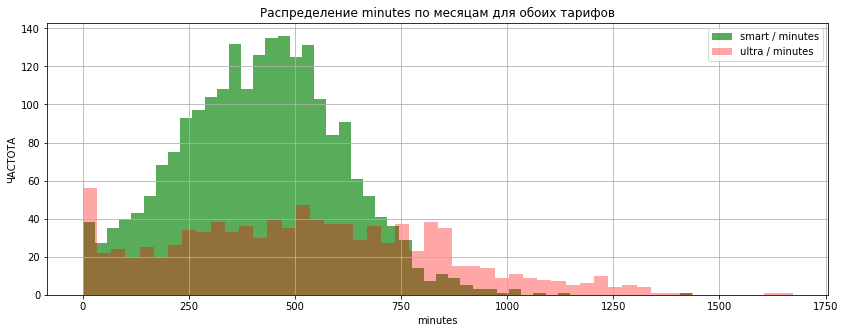

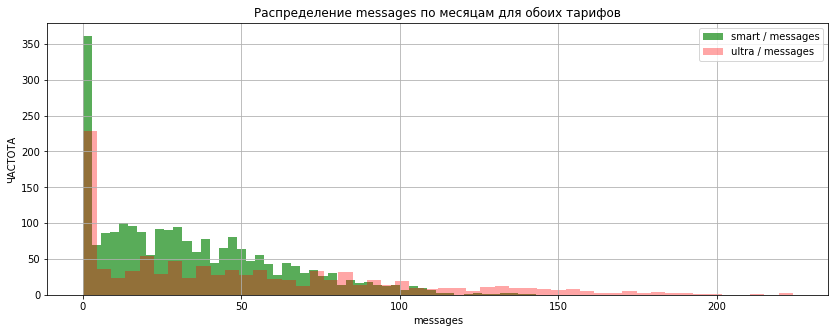

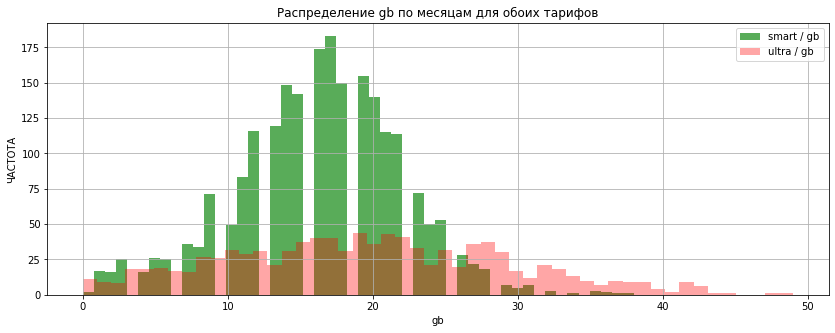

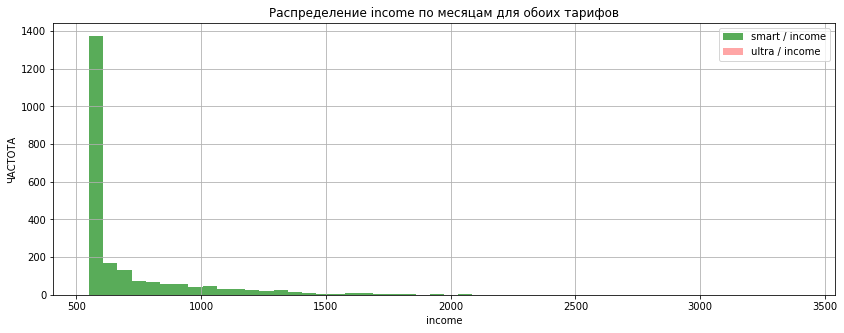

In [100]:
for param in ['minutes', 'messages', 'gb','income']:
    b = 50
    plt.figure(figsize=(14, 5))
    
    plt.hist(abonents.loc[abonents['tariff'] == "smart", param], label='smart / '+param, color='g', alpha=0.65, bins = b)
    plt.hist(abonents.loc[abonents['tariff'] == "ultra", param], label='ultra / '+param, color='r', alpha=0.35, bins = b)
    
    plt.ylabel('ЧАСТОТА')
    plt.xlabel(param)
    plt.grid()
    plt.title(f'Распределение {param} по месяцам для обоих тарифов')
    plt.legend()
    plt.show();

Теперь посчитаем параметры средненго, дисперсию и стандартного отклонения. Создадим для этого специальный датафрейм `statistics_dataframe` и расчитаем для него статистики.

Таблица `statistics_dataframe` - статистика для выборки. Столбцы:
`parameter` - (min-минуты, mes-СМС, gb-трафик)
`mean` - среднее значение
`var` - дисперсия
`std` - стандартное отклонение
`tariff` - тариф (smart, ultra, all-по обоим тарифам)

In [101]:
statistics_dataframe = pd.DataFrame(columns = ['parameter', 'mean', 'var', 'std', 'tariff'])

ind = 0
t = ['smart', 'ultra', 'all']
for param in ['minutes', 'messages', 'gb', 'income']:
    tariff_ind = 0
    for df in [smart, ultra, tariff_common]:
        statistics_dataframe.loc[ind, 'parameter'] = param
        statistics_dataframe.loc[ind, 'mean'] = round(df[param].mean(),1)
        statistics_dataframe.loc[ind, 'var'] = round(np.var(df[param], ddof=1),1) # Поскольку данные являются выборкой, это указано по условию, то ипользуем параметр - ddof=1
        statistics_dataframe.loc[ind, 'std'] = round(np.std(df[param], ddof=1),1)  
        statistics_dataframe.loc[ind, 'tariff'] = t[tariff_ind]
        ind +=1
        tariff_ind +=1
display(statistics_dataframe)

,parameter,mean,var,std,tariff
0,minutes,386.8,5221.8,72.3,smart
1,minutes,495.9,5998.5,77.5,ultra
2,minutes,441.3,8475.5,92.1,all
3,messages,31.4,26.0,5.1,smart
4,messages,43.7,151.8,12.3,ultra
5,messages,37.6,124.5,11.2,all
6,gb,15.2,6.9,2.6,smart
7,gb,18.3,8.5,2.9,ultra
8,gb,16.7,9.8,3.1,all
9,income,667.1,3034.1,55.1,smart


Теперь рассчитаем среднее значение долей стандартного отклоанения и запишем его в столбец `standart_deviation(%)`.

In [102]:
statistics_dataframe['standart_deviation(%)'] = statistics_dataframe['std'] / statistics_dataframe['mean'] * 100
display(statistics_dataframe)
print('Медианные значения месяца пользование тарифа абонентом в 2018 году')
for parametr in ['minutes', 'messages', 'gb', 'income']:
    print(f'Кол-во {parametr}: smart = {round(smart[parametr].median())} / ultra = {round(ultra[parametr].median())}')

,parameter,mean,var,std,tariff,standart_deviation(%)
0,minutes,386.8,5221.8,72.3,smart,18.69183
1,minutes,495.9,5998.5,77.5,ultra,15.628151
2,minutes,441.3,8475.5,92.1,all,20.870156
3,messages,31.4,26.0,5.1,smart,16.242038
4,messages,43.7,151.8,12.3,ultra,28.146453
5,messages,37.6,124.5,11.2,all,29.787234
6,gb,15.2,6.9,2.6,smart,17.105263
7,gb,18.3,8.5,2.9,ultra,15.846995
8,gb,16.7,9.8,3.1,all,18.562874
9,income,667.1,3034.1,55.1,smart,8.259631


Медианные значения месяца пользование тарифа абонентом в 2018 году
Кол-во minutes: smart = 402 / ultra = 511
Кол-во messages: smart = 34 / ultra = 45
Кол-во gb: smart = 16 / ultra = 19
Кол-во income: smart = 670 / ultra = 1950


**Вывод: Из вышеприведённой таблицы видно, что медианные значения чуть больше средних значений. Это значит, что данные скошены влево. Если говорить о стандартном отклаонении, то оно находится в пределах нормы по всем параметрам, кроме строки messages. Вероятнее всего, это связано с тем, что абоненты мало отправляют СМС.**

**Общий вывод по 3му шагу:** 

**Большинство абонентов тарифа smart укладывабтся в его пользование (до 500 минут), как и в тарифе ultra (до 600 минут). По графикам мы видим увеличивающееся количество пользование трафиком с каждым месяцем.**

**Пользование СМС - самая непопулярная услуга, однако пользователи тарифа ultra чаще пользуются услугами СМС, чем smart. Однако число пользованием СМС в тарифе ultra возрастает с каждым месяцем в течение года, тариф же smart по СМС-показателям растёт намного медленней.**

**Пользование Интернетом - наиболее популярная услуга среди всех. Некоторые пользователи выходят за него. Также в течение года наблюдается планомерный рост пользования Интернетом, однако наблюдается не такая высокая активность пользования Интернетом по сравнению с концом года. Если говорить про распределению интернета по тарифам, то пользователи тарифа Smart явно выходят за рамки тарифа, посокльку большинство абонетнов используют в в месяц в среднем 16 Гбайт.**
**Если говорить о выручке, то с каждого абонента, который пользуется ultra, компания получает 2049.7 рублей, а за тариф smart - 1186.6	в среднем. И самые большие расходы у абонентов приходятся на пользование Интернетом.**

# Шаг 4. Проверка гипотез

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Пороговое значение `alpha` задать самостоятельно.

Пояснить:

* как была сформулирована нулевая и альтернативная гипотезы;
* какой критерий использовался для проверки гипотез и почему.

**4.1 средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

In [103]:
display(abonents)

,user_id,month,calls,minutes,messages,gb,city,tariff,income
0,1000,5.0,22.0,159.0,22.0,3.0,Краснодар,ultra,1950
1,1000,6.0,43.0,172.0,60.0,23.0,Краснодар,ultra,1950
2,1000,7.0,47.0,340.0,75.0,14.0,Краснодар,ultra,1950
3,1000,8.0,52.0,408.0,81.0,14.0,Краснодар,ultra,1950
4,1000,9.0,58.0,466.0,57.0,15.0,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,11.0,Санкт-Петербург,smart,550
3210,1489,9.0,0.0,0.0,32.0,17.0,Санкт-Петербург,smart,550
3211,1489,10.0,0.0,0.0,21.0,20.0,Санкт-Петербург,smart,550
3212,1489,11.0,0.0,0.0,20.0,18.0,Санкт-Петербург,smart,550


Запишем выручку в две таблицы `smart_income_mean` и `ultra_income_mean` по каждолму тарифу.

In [104]:
ultra_income_mean = abonents.query('tariff =="ultra"')['income'].values 
smart_income_mean = abonents.query('tariff =="smart"')['income'].values

In [105]:
print('Дисперсия smart_income_mean =', np.var(smart_income_mean), '// Дисперсия ultra_income_mean =', \
      np.var(ultra_income_mean))

Дисперсия smart_income_mean = 68100.67579146056 // Дисперсия ultra_income_mean = 0.0


Дисперсии между двумя выборками сильно разнятся. Поэтому для проведения теста возьмём `equal_var` = False. Поскольку у нас коммерческое исследование, а не научное, то задаем уровень значимости `alpha` 0.05. Сформулируем нулевую гипотезу как: Средние значения выручки между тарифами `smart` и `ultra` равны. Альтернативная - средние значения выручки между тарифами smart и ultra сильно отличаются друг от друга.

In [106]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(smart_income_mean, ultra_income_mean, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


/tmp/ipykernel_340/753741372.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results = st.ttest_ind(smart_income_mean, ultra_income_mean, equal_var = False)


**Вывод: Поскольку мы отвергли нулевую гипотезу о равенстве средних, то наша гипотеза №1 о разнице между средними выручками тарифа smart и ultra подтверждается.**

**4.2 средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Пороговое значение alpha задать самостоятельно.** 

Запишем выручку в две таблицы moscow_income_mean и regions_income_mean по каждолму тарифу

In [107]:
moscow_income_mean = abonents.query('city == "Москва"')['income'].values
regions_income_mean = abonents.query('city != "Москва"')['income'].values

In [108]:
print('Дисперсия moscow_income_mean =', np.var(moscow_income_mean), '// Дисперсия other_income_mean =', \
      np.var(regions_income_mean))

Дисперсия moscow_income_mean = 410031.8230691549 // Дисперсия other_income_mean = 375823.98484091985


Дисперсии между двумя выборками разнятся несильно. Поэтому ставим `equal_var=True`. Также мы выбираем уровень значимости `alpha` = 0.05, поскольку это маркетинговое, а не научное исследование. Нулевая гипотеза будет звучать так: Средние значения выручки по пользователям Москвы и регионов равны. Альтернативная - средние значения по пользователям Москвы и регионов сильно отличаются друг от друга.

In [109]:
alpha = 0.05

results = st.ttest_ind(moscow_income_mean, regions_income_mean, equal_var = True)

print('p-значение:', results.pvalue) # ваш код: выведите на экран получившееся p-значение)

if (results.pvalue < alpha): # ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0018497307474415955
Отвергаем нулевую гипотезу


**Вывод: Поскольку мы отвергли нулевую гипотезу о равенстве средних, то наша гипотеза №2 о разнице между средними выручками между абонентами Москвы и регионов smart и ultra опровегается.**

In [110]:
abonents.groupby('city')['income'].mean()

city
Архангельск     613.250000
Астрахань       907.833333
Балашиха       1159.343750
Барнаул        1461.888889
Белгород        577.400000
                  ...     
Челябинск      1187.365385
Череповец      1316.928571
Чита            816.000000
Якутск          564.117647
Ярославль      1080.333333
Name: income, Length: 76, dtype: float64

In [111]:
abonents.groupby('tariff')['income'].mean()

tariff
smart     692.216689
ultra    1950.000000
Name: income, dtype: float64

# Шаг 5. Написать общий вывод

**1. Предоработка данных: Практически все данные заполнены кроме столбца churn_date в файле users. Логически можно понять, что если churn_date - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных), то всё логично. Также будет необходимо перевести некоторые данные в тип Datetime и некоторые целочисленные значения в тип int. Теперь перейдём к предоработке данных.**

**2. Подготовка данных к анализу: В целом, столбец корректен. Были проверены даты на корректность. Даты были переведены в тип datetime где было необходимо, дубликаты отсутствовали. Таблицы корректны.**

**3. Анализ данных: Большинство абонентов тарифа smart укладывабтся в его пользование (до 500 минут), как и в тарифе ultra (до 600 минут). По графикам мы видим увеличивающееся количество пользование трафиком с каждым месяцем.**

**Пользование СМС - самая непопулярная услуга, однако пользователи тарифа ultra чаще пользуются услугами СМС, чем smart. Однако число пользованием СМС в тарифе ultra возрастает с каждым месяцем в течение года, тариф же smart по СМС-показателям растёт намного медленней.**

**Пользование Интернетом - наиболее популярная услуга среди всех. Некоторые пользователи выходят за него (более 15360 МБ). Такде в течение года наблюдается планомерный росто пользования Интернетом, однако наблюдается не такая высокая активность пользования Интернетом по сравнению с концом года. Если говорить о выручке, то с каждого абонента, который пользуется ultra, компания получает 2049.7 рублей, а за тариф smart - 1186.6 в среднем. И самые большие расходы у абонентов приходятся на пользование Интернетом.**

**4. Проверка гипотез: Наша гипотеза №1 о разнице между средними выручками тарифа smart и ultra подтверждается. Наша гипотеза №2 о разнице между средними выручками между абонентами Москвы и регионов smart и ultra опровегается**